<a href="https://colab.research.google.com/github/Sookchand/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

1. Load the data(x and Y). it may involve data preprocessing
2. Instantiate the model. This model does not have "activation"
3. Train ("fit the model)the model
4. Evaluate the model

# No Activation Function

model = tf.keras.models.Sequential([ tf.keras.layers.Input(shape = (1, )), tf.keras.layers.Dense(1) ])

Note: activation = None is the default value

# Stochastic Gradient Decent(SGD)

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9). loss = "mse"

Why? on the coming data set "Adam" did not do well.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2020-10-26 19:01:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-26 19:01:20 (36.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# Load in data
data = pd.read_csv("moore.csv", header = None).values
data.shape



(162, 2)

In [4]:
x = data[:,0].reshape(-1, 1) # Make it a 2-d array where size N * D where D = 1
y = data[:,1]

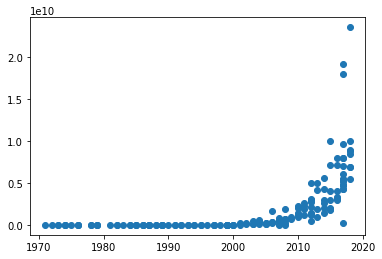

In [5]:
# plot the data
plt.scatter(x, y)

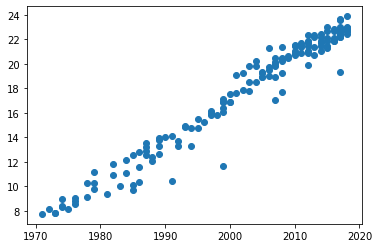

In [6]:
# since we want a linear model lets take the log
y = np.log(y)
plt.scatter(x, y);

In [7]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
x = x - x.mean()

In [8]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(x, y, epochs=200, callbacks=[scheduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 410.7993
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 304.9754
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 256.1389
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 225.8505
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 178.0637
Epoch 6/200
6/6 [==============================] - 0s 973us/step - loss: 152.5716
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 110.5361
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 73.6961
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 74.5249
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 87.1386
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 87.9429
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 37.4272
Epoch 13/200
6/6 [======================

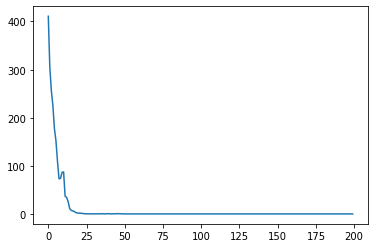

In [11]:
# Plot loss value
plt.plot(r.history["loss"], label ="loss");

In [13]:
# Get the slope of the line
# The slope of the line is equal to the double rating of the transistor
print(model.layers) # Note: there is only one layer as the input layer do not count
print(model.layers[0].get_weights())

[array([[0.34698007]], dtype=float32), array([17.762793], dtype=float32)]


In [14]:
# The slppe of the line is:
a = model.layers[0].get_weights()[0][0, 0]

Our original model for exponential growth is:

C=A0rt 

Where  C  is transistor the count and  t  is the year.

r  is the rate of growth. For example, when  t  goes from 1 to 2,  C  increases by a factor of  r . When  t  goes from 2 to 3,  C  increases by a factor of  r  again.

When we take the log of both sides, we get:

logC=logr∗t+logA0 

This is our linear equation:

y^=ax+b 

Where:

y^=logC 
a=logr 
x=t 
b=logA0 

We are interested in  r , because that's the rate of growth. Given our regression weights, we know that:

a=0.34188038 

so that:

            r=e0.34188038=1.4076 

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for  C  to increase to  2C .

Let's call the original starting time  t , to correspond with the initial transistor count  C .

Let's call the end time  t′ , to correspond with the final transistor count  2C .

Then we also have:

            2C=A0rt′ 

Combine this with our original equation:

            C=A0rt 

We get (by dividing the 2 equations):

            2C/C=(A0rt′)/A0rt 

Which simplifies to:

            2=r(t′−t) 

Solve for  t′−t :

            t′−t=log2logr=log2a

In [16]:
print("time to double:", np.log(2)/a)

time to double: 1.9976570710063866


In [20]:
# If you know the analytical solution
x = np.array(x).flatten()
y = np.array(y)
denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum()) / denominator
b = (x.dot(y) - x.mean() * x.dot(y))/denominator
print(a, b)
print("time to Double:", np.log(2) / a)

0.341682487387313 0.34168248738729573
time to Double: 2.0286295205239204


# Making Prediction


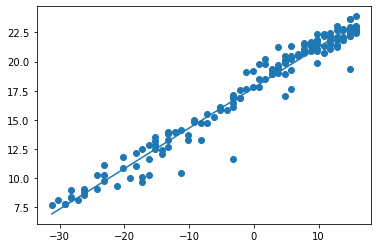

In [21]:
# Making sure the line fits the data
yhat = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, yhat);

In [22]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# reshape x becuase we flatten it earlier
x = x.reshape(-1, 1)

# (N x 1) (1 x 1) ---> (N x 1)
yhat2 = (x.dot(w) + b).flatten()

# Do not use == for floating points
np.allclose(yhat, yhat2)

True

# Making Prediction 2



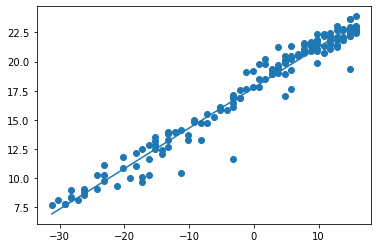

In [24]:
# Make sure the line fits our data
yhat = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, yhat)

In [26]:
# Manual calculation
# Get the weights
w, b = model.layers[0].get_weights()

# reshape x becuase we flatten it earlier
x = x.reshape(-1, 1)

# (N x 1) x (1, 1) + (1)---> (N x 1)
yhat2 = (x.dot(w) + b).flatten()

# do not use == for floating points
np.allclose(yhat, yhat2)

True

In [27]:
# Lets save the mdoel to the file
model.save("linearregression.h5")

In [30]:
# Checking to see if file was saved
!ls -lh


total 28K
-rw-r--r-- 1 root root  18K Oct 26 21:02 linearregression.h5
-rw-r--r-- 1 root root 2.3K Oct 26 19:01 moore.csv
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [32]:
model = tf.keras.models.load_model("linearregression.h5")
print(model.layers)
np.allclose(yhat, yhat2)

True